In [1]:
import requests
import json

In [2]:
from PIL import Image
import requests
from io import BytesIO
URL_IMG = "https://nocamels.com/wp-content/uploads/2019/06/yandex-light.jpeg"
response = requests.get(URL_IMG)
img_pil = Image.open(BytesIO(response.content))

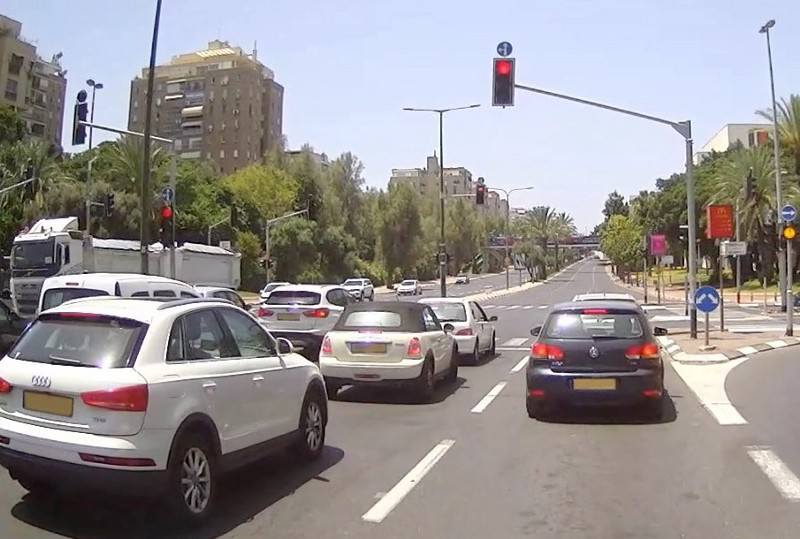

In [3]:
img_pil

In [4]:
img_pil.save('test_img.png')

In [5]:
type(response.content)

bytes

In [6]:
URL_APP = "http://18.215.233.82"

## Call the API with an image file

In [7]:
# import time
# start = time.time()

# # api-endpoint 
# API_ENDPOINT = f"{URL_APP}/img2class/"
  
# # data to be sent to api 
# files = {'file': open(name_img, 'rb')}

# # sending post request and saving response as response object 
# r = requests.post(url = API_ENDPOINT, files=files) 

# print(r.status_code)

# end = time.time()
# print(f"Time elapsed = {end-start}")
# r.json()

## Call the API with the image directly

In [8]:
# def image_to_byte_array(image:Image):
#   imgByteArr = BytesIO()
#   image.save(imgByteArr, format=image.format)
#   imgByteArr = imgByteArr.getvalue()
#   return imgByteArr

In [9]:
# # img_bytes = response.content
# img_bytes = image_to_byte_array(img_pil)
# img_bytes_io = BytesIO(img_bytes)
# type(img_bytes_io)

In [10]:
# type(open(name_img, 'rb'))

In [11]:
# files = {'file':img_bytes_io}

# # sending post request and saving response as response object 
# r = requests.post(url = API_ENDPOINT, files=files) 

# print(r.status_code)
# r.json()

## Test img2img API

In [16]:
import time
start = time.time()

# api-endpoint 
API_ENDPOINT = f"{URL_APP}/img2img/"

# data to be sent to api 
img_bytes = response.content 
files = {'file': open('test_img.png', 'rb')}

# sending post request and saving response as response object 
r = requests.post(url = API_ENDPOINT, files=files) 

print(r.status_code)

end = time.time()
print(f"Time elapsed = {end-start}")
# r.json()

200
Time elapsed = 12.539926528930664


In [17]:
type(BytesIO(r.content))

_io.BytesIO

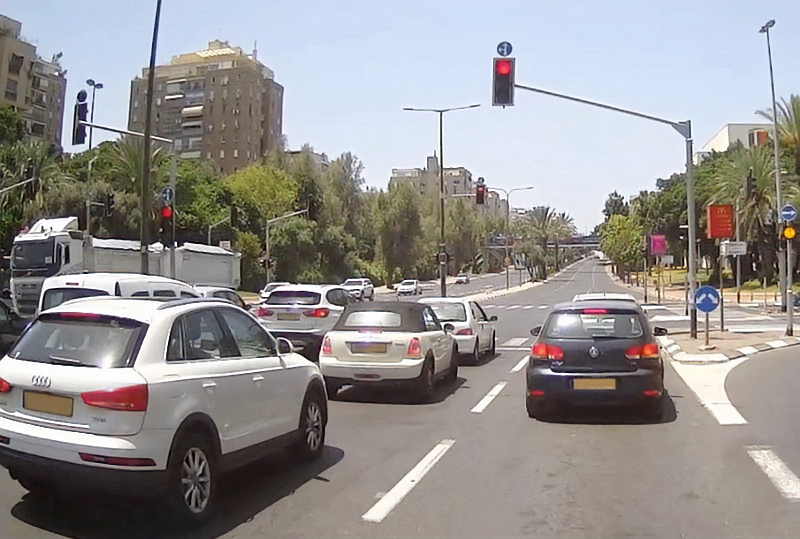

In [18]:
dataBytesIO = BytesIO(r.content)
img_hr = Image.open(dataBytesIO)
img_hr

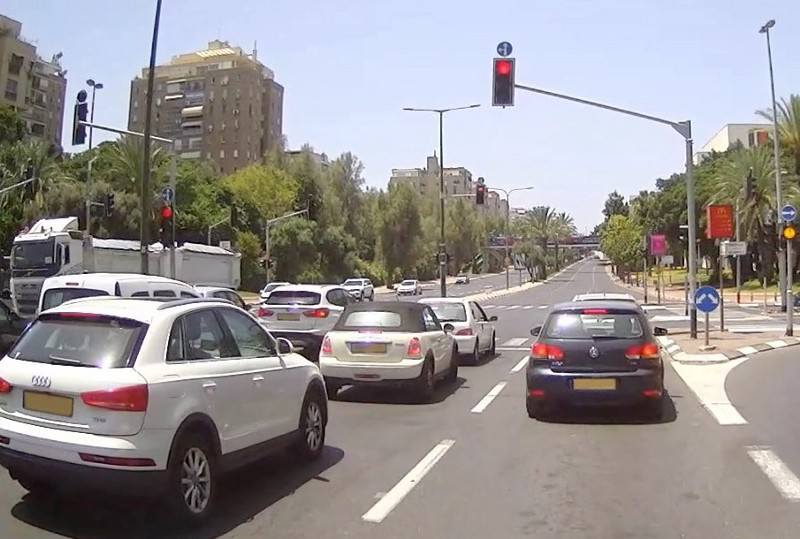

In [19]:
img_in = Image.open('test_img.png')
img_in